Import libraries

In [2]:
# Data manipulation and file handling
import pandas as pd  # for data manipulation
import pyarrow.feather as feather  # for reading/writing Feather files

# Modeling and machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # example model
from sklearn.metrics import accuracy_score, classification_report  # evaluation metrics

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Open training 
df= pd.read_feather('../data/processed/train_data_1.feather')

In [4]:
# Open testing
tdf = pd.read_feather('../data/processed/test_data_1.feather') 

In [5]:
df.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,isRefundable,isBasicEconomy,totalFare,totalTravelDistance,segmentsArrivalAirportCode,DepartureTimeHour,CabinCode,AirlineNameScore,date_diff_days,weekday
6164974,2022-04-18,2022-05-10,SFO,DFW,True,False,False,283.600006,1468.0,DFW,13,1.0,4,22,1
63647,2022-04-21,2022-05-10,ATL,MIA,True,False,False,35.970001,596.0,MIA,10,1.0,1,19,1
5067940,2022-04-17,2022-06-05,OAK,ATL,False,False,False,334.579987,NaN,LAX||ATL,6,1.0,1,49,6
3385047,2022-04-28,2022-06-27,LAX,BOS,False,False,False,353.600006,2666.0,PHX||BOS,18,1.0,4,60,0
2982409,2022-04-19,2022-04-28,JFK,ATL,True,False,True,148.600006,762.0,ATL,12,1.0,4,9,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5287832 entries, 6164974 to 6413414
Data columns (total 15 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   searchDate                  datetime64[ns]
 1   flightDate                  datetime64[ns]
 2   startingAirport             object        
 3   destinationAirport          object        
 4   isNonStop                   bool          
 5   isRefundable                bool          
 6   isBasicEconomy              bool          
 7   totalFare                   float32       
 8   totalTravelDistance         float32       
 9   segmentsArrivalAirportCode  object        
 10  DepartureTimeHour           uint8         
 11  CabinCode                   float32       
 12  AirlineNameScore            uint8         
 13  date_diff_days              uint16        
 14  weekday                     uint8         
dtypes: bool(3), datetime64[ns](2), float32(3), object(3), uint16(1), 

In [7]:
df.shape

(5287832, 15)

In [8]:

# # Calculate average price per route
# route_avg_price = (
#     df.groupby(['startingAirport', 'destinationAirport'])['totalFare']
#     .mean()
#     .reset_index()
#     .rename(columns={'totalFare': 'average_price'})
# )

# # Merge this back to the original dataset
# data = df.merge(route_avg_price, on=['startingAirport', 'destinationAirport'], how='left')

In [9]:
data = df.copy()

In [10]:
data.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,isRefundable,isBasicEconomy,totalFare,totalTravelDistance,segmentsArrivalAirportCode,DepartureTimeHour,CabinCode,AirlineNameScore,date_diff_days,weekday
6164974,2022-04-18,2022-05-10,SFO,DFW,True,False,False,283.600006,1468.0,DFW,13,1.0,4,22,1
63647,2022-04-21,2022-05-10,ATL,MIA,True,False,False,35.970001,596.0,MIA,10,1.0,1,19,1
5067940,2022-04-17,2022-06-05,OAK,ATL,False,False,False,334.579987,NaN,LAX||ATL,6,1.0,1,49,6
3385047,2022-04-28,2022-06-27,LAX,BOS,False,False,False,353.600006,2666.0,PHX||BOS,18,1.0,4,60,0
2982409,2022-04-19,2022-04-28,JFK,ATL,True,False,True,148.600006,762.0,ATL,12,1.0,4,9,3


In [11]:
# # Display a few sample rows with 'startingAirport', 'destinationAirport', 'totalFare', and 'average_price'
# print(data[['startingAirport', 'destinationAirport', 'totalFare', 'average_price']].sample(10))


In [12]:
# Step 3: Merge the same average price into the test set
# This will apply the training-set-based averages to the test set routes
# tdf = tdf.merge(route_avg_price, on=['startingAirport', 'destinationAirport'], how='left')

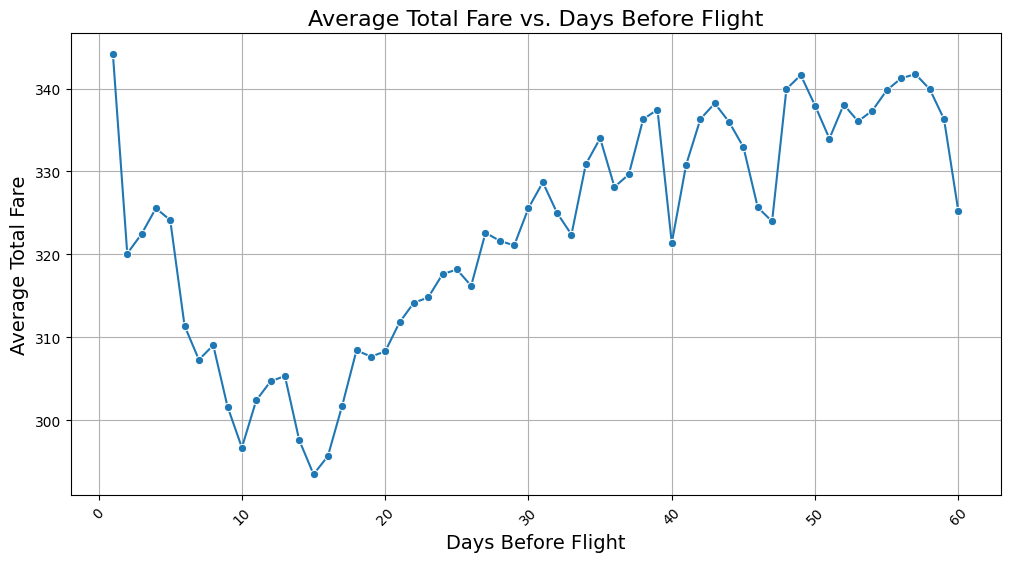

In [14]:
# Calculate average total fare by days before flight
import pandas as pd             # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For advanced plotting

avg_fare_by_days = data.groupby('date_diff_days')['totalFare'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_diff_days', y='totalFare', data=avg_fare_by_days, marker='o')
plt.title('Average Total Fare vs. Days Before Flight', fontsize=16)
plt.xlabel('Days Before Flight', fontsize=14)
plt.ylabel('Average Total Fare', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


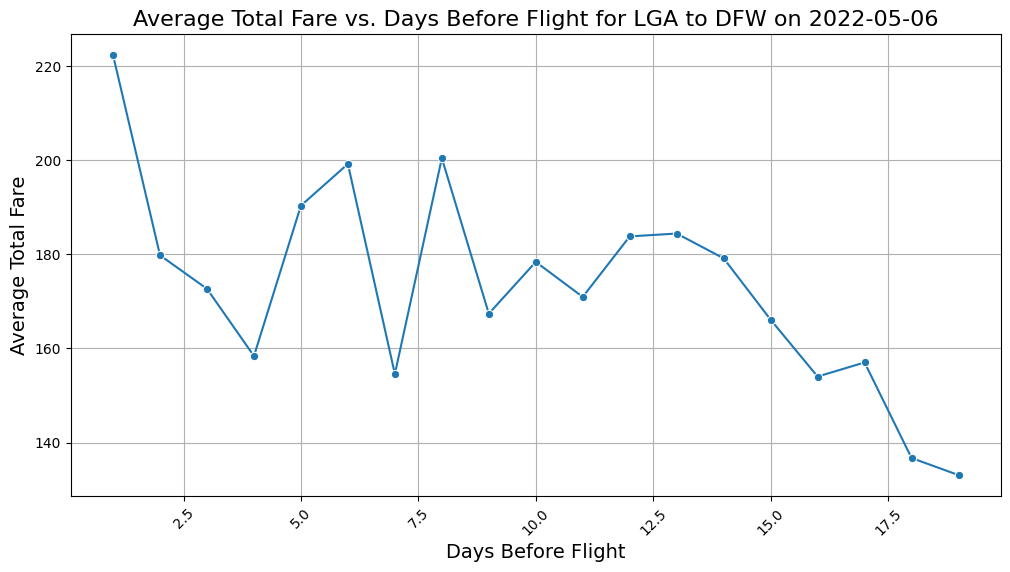

In [15]:
# Specify the criteria for a single flight
starting_airport = 'LGA'  # Change this to your desired starting airport
destination_airport = 'DFW'  # Change this to your desired destination airport
specific_flight_date = '2022-05-06'  # Change this to your desired flight date

# Filter the data for the specific flight
single_flight_data = data[(data['startingAirport'] == starting_airport) & 
                           (data['destinationAirport'] == destination_airport) & 
                           (data['flightDate'] == specific_flight_date)]

# Calculate average total fare by days before flight for this specific flight
avg_fare_by_days = single_flight_data.groupby('date_diff_days')['totalFare'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_diff_days', y='totalFare', data=avg_fare_by_days, marker='o')
plt.title(f'Average Total Fare vs. Days Before Flight for {starting_airport} to {destination_airport} on {specific_flight_date}', fontsize=16)
plt.xlabel('Days Before Flight', fontsize=14)
plt.ylabel('Average Total Fare', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


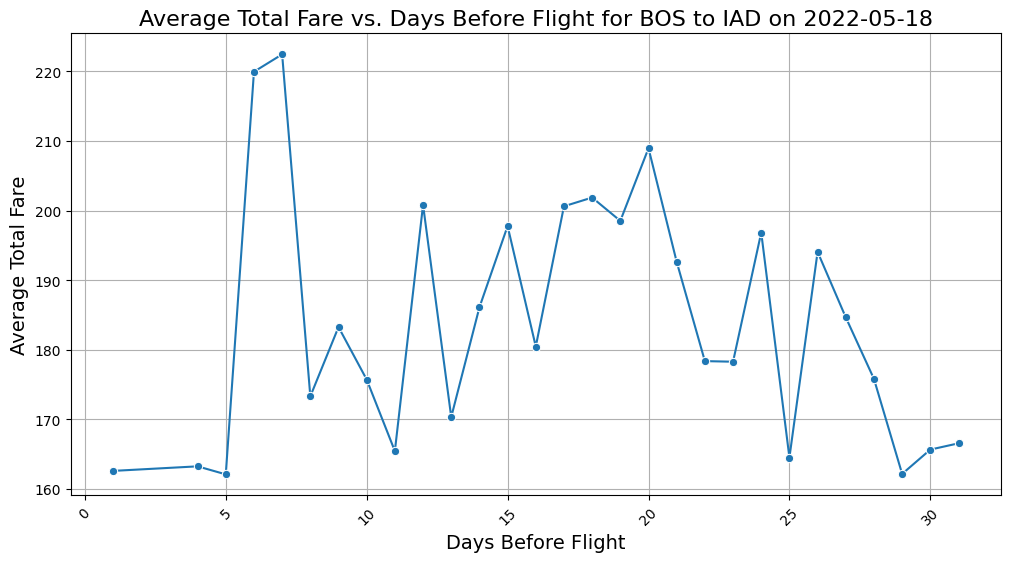

In [16]:
# Specify the criteria for another single flight
starting_airport = 'BOS'  # Change this to your desired starting airport
destination_airport = 'IAD'  # Change this to your desired destination airport
specific_flight_date = '2022-05-18'  # Change this to your desired flight date

# Filter the data for this specific flight
another_flight_data = data[(data['startingAirport'] == starting_airport) & 
                            (data['destinationAirport'] == destination_airport) & 
                            (data['flightDate'] == specific_flight_date)]

# Calculate average total fare by days before flight for this specific flight
avg_fare_by_days_another = another_flight_data.groupby('date_diff_days')['totalFare'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_diff_days', y='totalFare', data=avg_fare_by_days_another, marker='o')
plt.title(f'Average Total Fare vs. Days Before Flight for {starting_airport} to {destination_airport} on {specific_flight_date}', fontsize=16)
plt.xlabel('Days Before Flight', fontsize=14)
plt.ylabel('Average Total Fare', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [17]:
data.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,isRefundable,isBasicEconomy,totalFare,totalTravelDistance,segmentsArrivalAirportCode,DepartureTimeHour,CabinCode,AirlineNameScore,date_diff_days,weekday
6164974,2022-04-18,2022-05-10,SFO,DFW,True,False,False,283.600006,1468.0,DFW,13,1.0,4,22,1
63647,2022-04-21,2022-05-10,ATL,MIA,True,False,False,35.970001,596.0,MIA,10,1.0,1,19,1
5067940,2022-04-17,2022-06-05,OAK,ATL,False,False,False,334.579987,NaN,LAX||ATL,6,1.0,1,49,6
3385047,2022-04-28,2022-06-27,LAX,BOS,False,False,False,353.600006,2666.0,PHX||BOS,18,1.0,4,60,0
2982409,2022-04-19,2022-04-28,JFK,ATL,True,False,True,148.600006,762.0,ATL,12,1.0,4,9,3


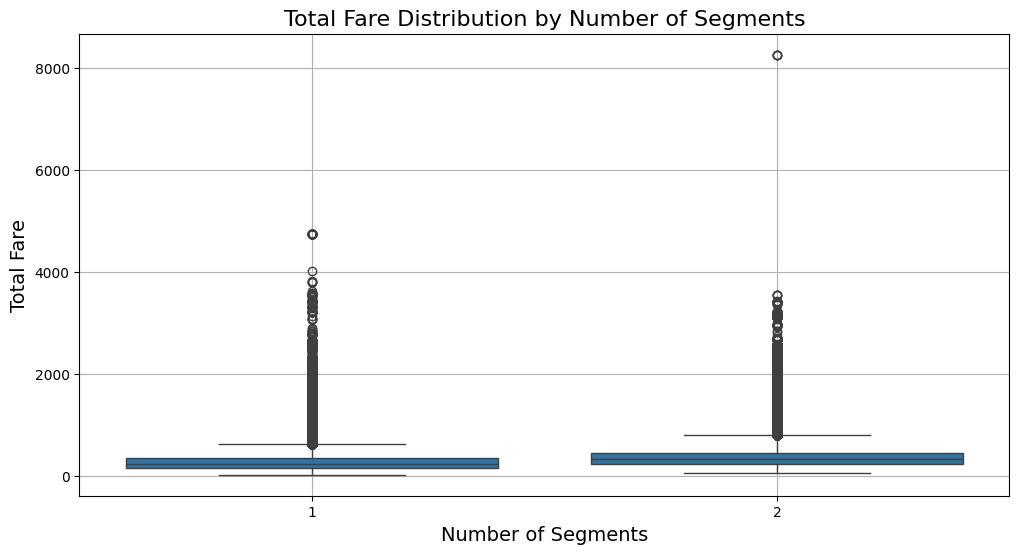

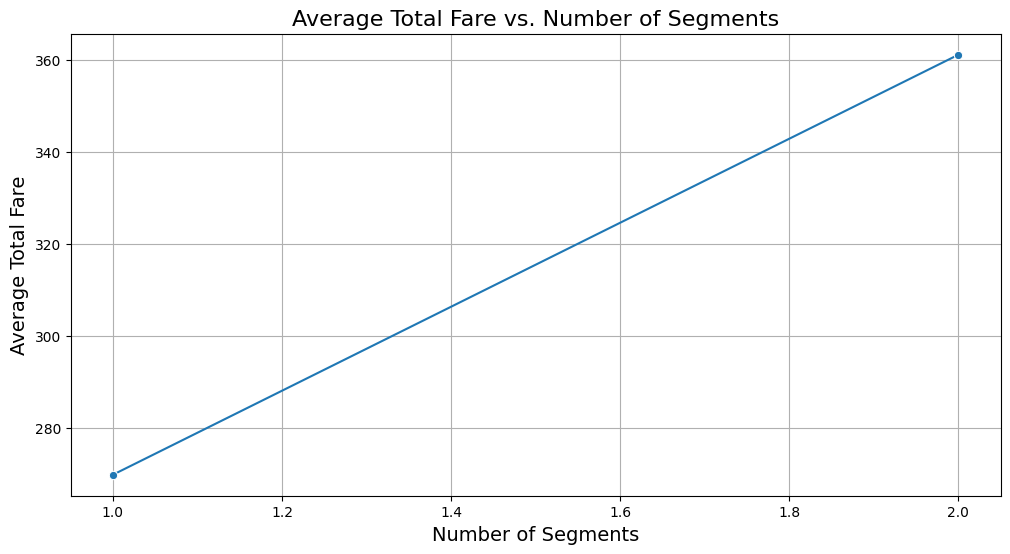

In [18]:
# Create a feature to count the number of segments
data['num_segments'] = data['segmentsArrivalAirportCode'].apply(lambda x: len(x.split('||')))

# Visualize the relationship between number of segments and total fare
plt.figure(figsize=(12, 6))
sns.boxplot(x='num_segments', y='totalFare', data=data)
plt.title('Total Fare Distribution by Number of Segments', fontsize=16)
plt.xlabel('Number of Segments', fontsize=14)
plt.ylabel('Total Fare', fontsize=14)
plt.grid(True)
plt.show()

# Optionally, calculate the average fare by number of segments
avg_fare_by_segments = data.groupby('num_segments')['totalFare'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='num_segments', y='totalFare', data=avg_fare_by_segments, marker='o')
plt.title('Average Total Fare vs. Number of Segments', fontsize=16)
plt.xlabel('Number of Segments', fontsize=14)
plt.ylabel('Average Total Fare', fontsize=14)
plt.grid(True)
plt.show()


In [19]:
data.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,isRefundable,isBasicEconomy,totalFare,totalTravelDistance,segmentsArrivalAirportCode,DepartureTimeHour,CabinCode,AirlineNameScore,date_diff_days,weekday,num_segments
6164974,2022-04-18,2022-05-10,SFO,DFW,True,False,False,283.600006,1468.0,DFW,13,1.0,4,22,1,1
63647,2022-04-21,2022-05-10,ATL,MIA,True,False,False,35.970001,596.0,MIA,10,1.0,1,19,1,1
5067940,2022-04-17,2022-06-05,OAK,ATL,False,False,False,334.579987,NaN,LAX||ATL,6,1.0,1,49,6,2
3385047,2022-04-28,2022-06-27,LAX,BOS,False,False,False,353.600006,2666.0,PHX||BOS,18,1.0,4,60,0,2
2982409,2022-04-19,2022-04-28,JFK,ATL,True,False,True,148.600006,762.0,ATL,12,1.0,4,9,3,1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'data' is your DataFrame with all relevant features
# Select features
features = ['totalTravelDistance', 'date_diff_days' ,'weekday','DepartureTimeHour', 'AirlineNameScore',
            'startingAirport', 'destinationAirport', 'isNonStop','isRefundable','isBasicEconomy', 'CabinCode']

X = data[features]
y = data['totalFare']

# Define categorical and numerical columns
categorical_cols = ['startingAirport', 'destinationAirport']
numerical_cols = ['AirlineNameScore','CabinCode','totalTravelDistance', 'date_diff_days','DepartureTimeHour','weekday','isNonStop','isRefundable','isBasicEconomy'] #, 'average_price'

# Create transformers for both types of columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Prepare the final dataset
X_preprocessed = preprocessor.fit_transform(X)




In [21]:
# Now, prepare the test data
X_test = tdf[features]  # Use the same features as the training set
# Transform the test data using the already fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_preprocessed, y)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Step 3: Calculate RMSE
rmse = np.sqrt(mean_squared_error(tdf['totalFare'], y_pred))  # Assuming 'totalFare' is the true target in tdf
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')



Root Mean Squared Error (RMSE): 98.77


In [315]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Step 4: Calculate MAE
mae = mean_absolute_error(tdf['totalFare'], y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 66.57


In [24]:
# Step 4: Print actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': tdf['totalFare'].values,
    'Predicted': y_pred
})
print("\nActual vs Predicted values:")
print(comparison_df)


Actual vs Predicted values:
             Actual   Predicted
0        338.609985  265.522430
1        246.600006  356.717072
2        219.600006  241.575745
3        448.600006  266.807800
4        383.609985  495.537231
...             ...         ...
1321954  195.589996  229.857635
1321955  183.600006  238.642441
1321956  337.600006  335.588470
1321957  339.579987  307.122375
1321958  172.600006  153.494339

[1321959 rows x 2 columns]


In [314]:
predictions_df = pd.DataFrame(y_pred, columns=['xgb_predicted_totalFare'])
predictions_df.to_csv('../data/processed/predictions_xgb.csv', index=False)

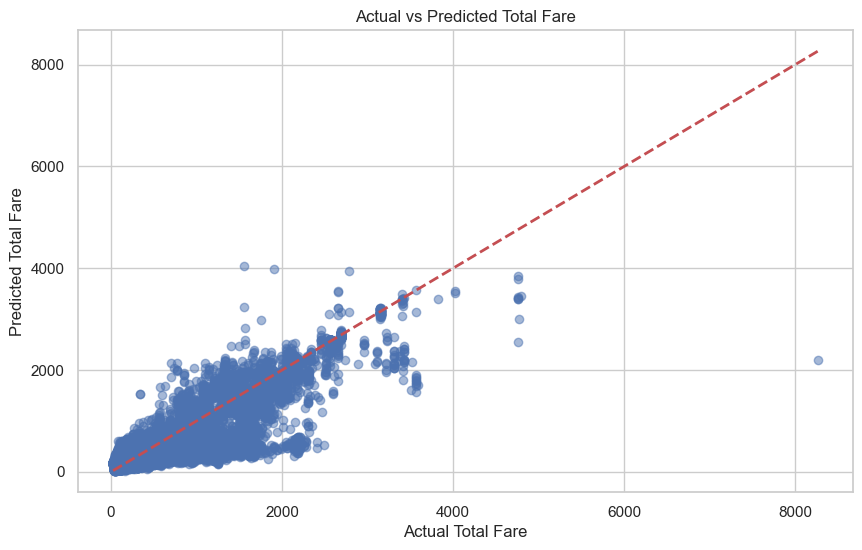

In [300]:
# Step 5: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Actual vs Predicted Total Fare')
plt.show()

In [25]:
import joblib

# Save model to a file
joblib.dump(model, '../models/xgboost_model.joblib')
# Save the preprocessor and the model
joblib.dump(preprocessor, '../models/preprocessor.joblib')

# To load the model back later
#model = joblib.load('xgboost_model.joblib')


['../models/preprocessor.joblib']